# Domain Proyek

Proyek ini bertujuan untuk mengklasifikasikan kelompok usia (senior/non-senior) berdasarkan data kesehatan dari survei NHANES. Klasifikasi kelompok usia berdasarkan indikator kesehatan menjadi sangat penting di era penuaan global saat ini, di mana populasi lanjut usia (senior) terus meningkat secara signifikan. Menurut World Health Organization (WHO), proporsi populasi dunia yang berusia di atas 60 tahun akan hampir dua kali lipat dari 12% menjadi 22% antara tahun 2015 dan 2050.

Prediksi klasifikasi kelompok usia berdasarkan data kesehatan memiliki beberapa manfaat penting:

1. **Perencanaan Kebijakan Kesehatan**: Memahami hubungan antara indikator kesehatan dan kelompok usia dapat membantu pemerintah dan institusi kesehatan dalam merencanakan program kesehatan yang tepat sasaran.

2. **Alokasi Sumber Daya**: Dengan mengetahui karakteristik kesehatan berdasarkan kelompok usia, sumber daya kesehatan dapat dialokasikan secara lebih efektif, terutama untuk kelompok yang membutuhkan perhatian khusus.

3. **Identifikasi Faktor Risiko**: Model klasifikasi dapat membantu mengidentifikasi faktor-faktor kesehatan yang paling berpengaruh terhadap penuaan, sehingga upaya preventif dapat difokuskan pada faktor-faktor tersebut.

4. **Personalisasi Perawatan Kesehatan**: Hasil dari model klasifikasi dapat membantu dalam pengembangan pendekatan perawatan yang lebih personal berdasarkan profil kesehatan individu.

Masalah ini menjadi sangat relevan dalam konteks Indonesia, di mana menurut Badan Pusat Statistik (BPS), struktur demografi Indonesia mulai mengarah pada fenomena "ageing population" dengan persentase penduduk lanjut usia (60 tahun ke atas) yang meningkat signifikan dari tahun 2020, diperkirakan melebihi 10 persen. Proyeksi BPS bahkan menunjukkan bahwa pada tahun 2045, lansia diperkirakan akan mencapai hampir seperlima dari total populasi Indonesia. Dengan memahami hubungan antara data kesehatan dan kelompok usia, kita dapat mengembangkan strategi yang lebih efektif untuk meningkatkan kualitas hidup dan kesejahteraan seluruh lapisan masyarakat, terutama kelompok lanjut usia yang semakin bertambah.

# Business Understanding

## Problem Statements
- Bagaimana cara mengklasifikasikan kelompok usia (senior/non-senior) secara akurat berdasarkan indikator kesehatan yang tersedia dalam dataset NHANES?
- Apa saja faktor atau indikator kesehatan yang paling berpengaruh dalam menentukan kelompok usia seseorang?
- Bagaimana cara menangani ketidakseimbangan data pada kategori target (senior/non-senior) untuk mendapatkan model yang handal?

## Goals
- Mengembangkan model machine learning yang dapat mengklasifikasikan kelompok usia (senior/non-senior) dengan akurasi tinggi berdasarkan indikator kesehatan.
- Mengidentifikasi dan menganalisis fitur-fitur penting yang memiliki pengaruh signifikan dalam klasifikasi kelompok usia.
- Mengatasi masalah ketidakseimbangan data untuk memastikan model dapat memprediksi kedua kelas dengan baik.

## Solution Statements
1. **Implementasi Multiple Machine Learning Algorithms**:
   - Menggunakan algoritma Logistic Regression sebagai baseline model karena interpretabilitasnya yang tinggi dalam masalah klasifikasi biner.
   - Menerapkan algoritma Random Forest untuk menangkap pola non-linear dan interaksi kompleks antar fitur kesehatan.
   - Mengimplementasikan XGBoost yang dikenal memiliki performa tinggi untuk berbagai masalah klasifikasi.

2. **Visualisasi Korelasi Data terhadap Kelompok Usia melalui EDA**:
   - Menerapkan analisis korelasi untuk menentukan indikator kesehatan yang memiliki hubungan kuat dengan kelompok usia
   - Menggunakan heatmap, boxplot, dan histogram untuk memvisualisasikan hubungan antara fitur dan target, sehingga memudahkan interpretasi pengaruh masing-masing indikator kesehatan

3. **Penanganan Data Tidak Seimbang**:
   - Menerapkan teknik oversampling dengan SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan distribusi kelas target.

# Data Understanding

Dataset yang digunakan adalah "National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset" yang dapat diunduh dari [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset). Dataset ini merupakan subset dari survei kesehatan nasional Amerika Serikat yang berisi 2278 sampel dengan 10 variabel yang mencakup informasi demografis dan indikator kesehatan.

NHANES (National Health and Nutrition Examination Survey) adalah program penelitian yang dirancang untuk menilai kesehatan dan status gizi orang dewasa dan anak-anak di Amerika Serikat. Survei ini menggabungkan wawancara dan pemeriksaan fisik, menjadikannya sumber data yang komprehensif untuk analisis kesehatan populasi.

## Data Loading

### Import Library

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [217]:
!pip install ucimlrepo

In [218]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

# data (as pandas dataframes)
df = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.original
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


### Exploratory Data Analysis - Deskripsi Variabel

| Column Name | Type     | Data Type   | Description                                                                                   | Target |
|-------------|----------|-------------|-----------------------------------------------------------------------------------------------|--------|
| SEQN        | ID       | Continuous  | Respondent Sequence Number                                                                    | no     |
| age_group   | Target   | Categorical | respondents 65 years old and older were labeled  as “senior” and all individuals under 65 years old as “non-senior.”                 | yes    |
| RIDAGEYR    | Other    | Continuous  | Respondent's Age                                                                              | no     |
| RIAGENDR    | Feature  | Categorical | Respondent's Gender                                                                           | no     |
| PAQ605      | Feature  | Categorical | Participation in moderate or vigorous-intensity physical activity in a typical week          | no     |
| BMXBMI      | Feature  | Continuous  | Respondent's Body Mass Index                                                                  | no     |
| LBXGLU      | Feature  | Continuous  | Respondent's Blood Glucose after fasting                                                      | no     |
| DIQ010      | Feature  | Categorical | Diabetes status of the respondent                                                             | no     |
| LBXGLT      | Feature  | Continuous  | Respondent's Oral Glucose Tolerance Test result                                               | no     |
| LBXIN       | Feature  | Continuous  | Respondent's Blood Insulin Levels                                                             | no     |


In [219]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


Statistik deskriptif terlihat cukup normal

### Exploratory Data Analysis - Univariate Analysis

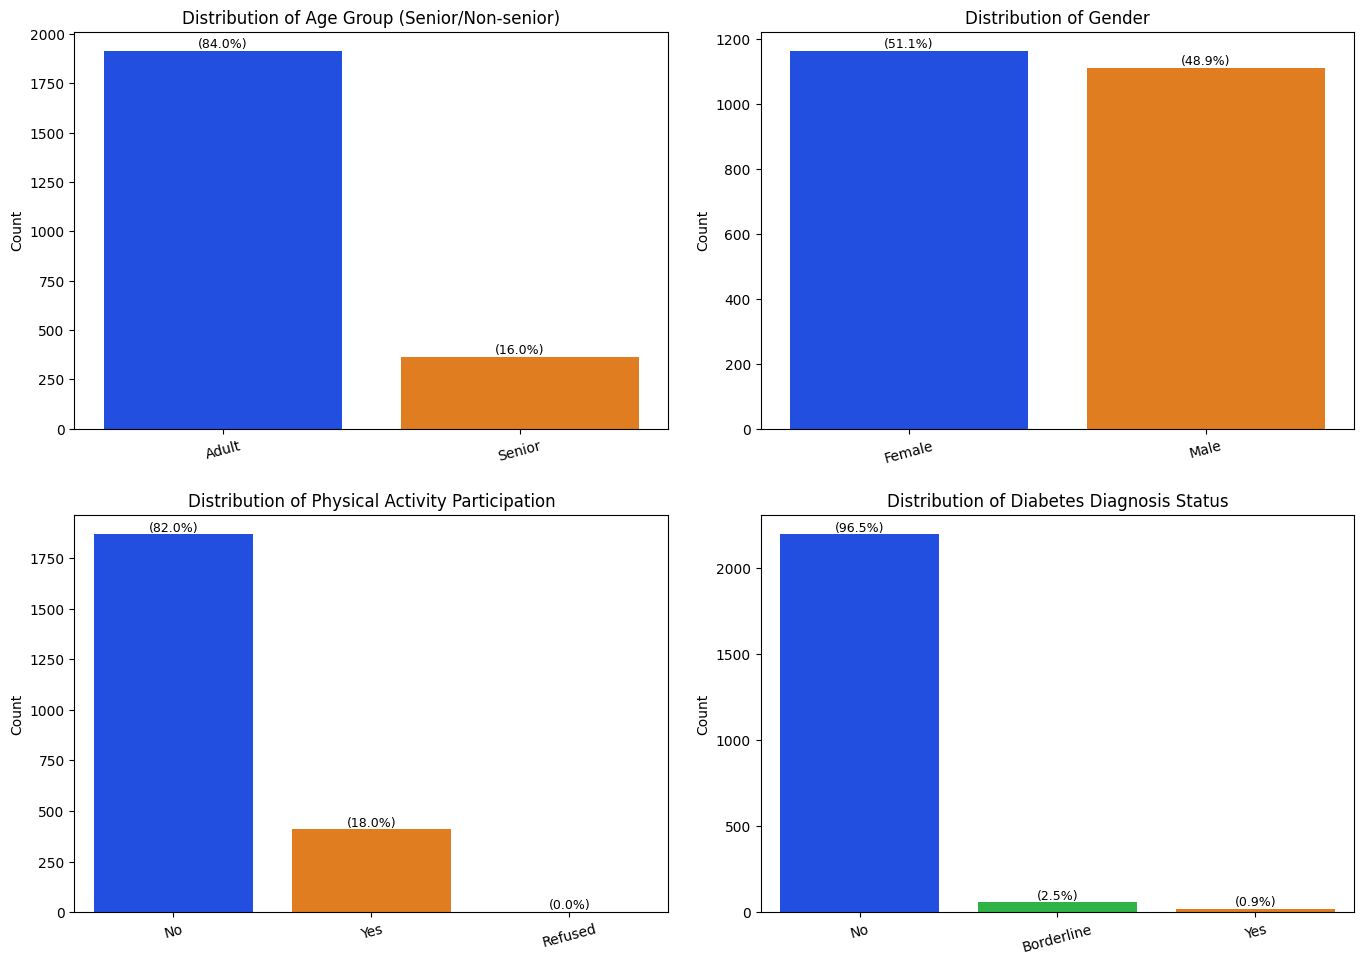

In [220]:
df_viz = df.copy()

# Mapping label kategorikal
df_viz['RIAGENDR'] = df_viz['RIAGENDR'].map({1: 'Male', 2: 'Female'})
df_viz['PAQ605'] = df_viz['PAQ605'].map({
    1: 'Yes',
    2: 'No',
    7: 'Refused',
    9: 'Don\'t know'
})
df_viz['DIQ010'] = df_viz['DIQ010'].map({
    1: 'Yes',
    2: 'No',
    3: 'Borderline',
    7: 'Refused',
    9: 'Don\'t know'
})

categorical = ['age_group', 'RIAGENDR', 'PAQ605', 'DIQ010']
simple_names = {
    'age_group': 'Age Group (Senior/Non-senior)',
    'RIAGENDR': 'Gender',
    'PAQ605': 'Physical Activity Participation',
    'DIQ010': 'Diabetes Diagnosis Status'
}


# Plotting
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical, 1):
    plt.subplot(2, 2, i)
    order = df_viz[col].value_counts().index
    ax = sns.countplot(data=df_viz, x=col, hue=col, legend=False, palette='bright', order=order)

    total = len(df_viz)
    for p in ax.patches:
        count = int(p.get_height())
        percent = 100 * count / total
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'({percent:.1f}%)', (x, y), ha='center', va='bottom', fontsize=9)

    # Gunakan nama yang mudah dimengerti
    plt.title(f'Distribution of {simple_names.get(col, col)}')
    plt.xticks(rotation=15)
    plt.xlabel(None)
    plt.ylabel('Count')

plt.tight_layout(pad=2.0)
plt.show()


Berdasarkan plotting grafik didapatkan bahwa:
- age_group didominasi oleh `adult` sebanyak 84%
- RIAGENDR didominasi oleh `female` sebanyak 51.1%
- PAQ605 (Vigorous Activity) didominasi oleh `tidak` sebanyak 82%
- DIQ010 (Diabetes) didominasi oleh `tidak` sebanyak 96.5%

Terdapat data yang tidak seimbang pada kolom target yaitu `age_group`, hal ini dapat menyebabkan bias pada nilai yang dominan, sehingga perlu dilakukan penanganan data tidak seimbang.

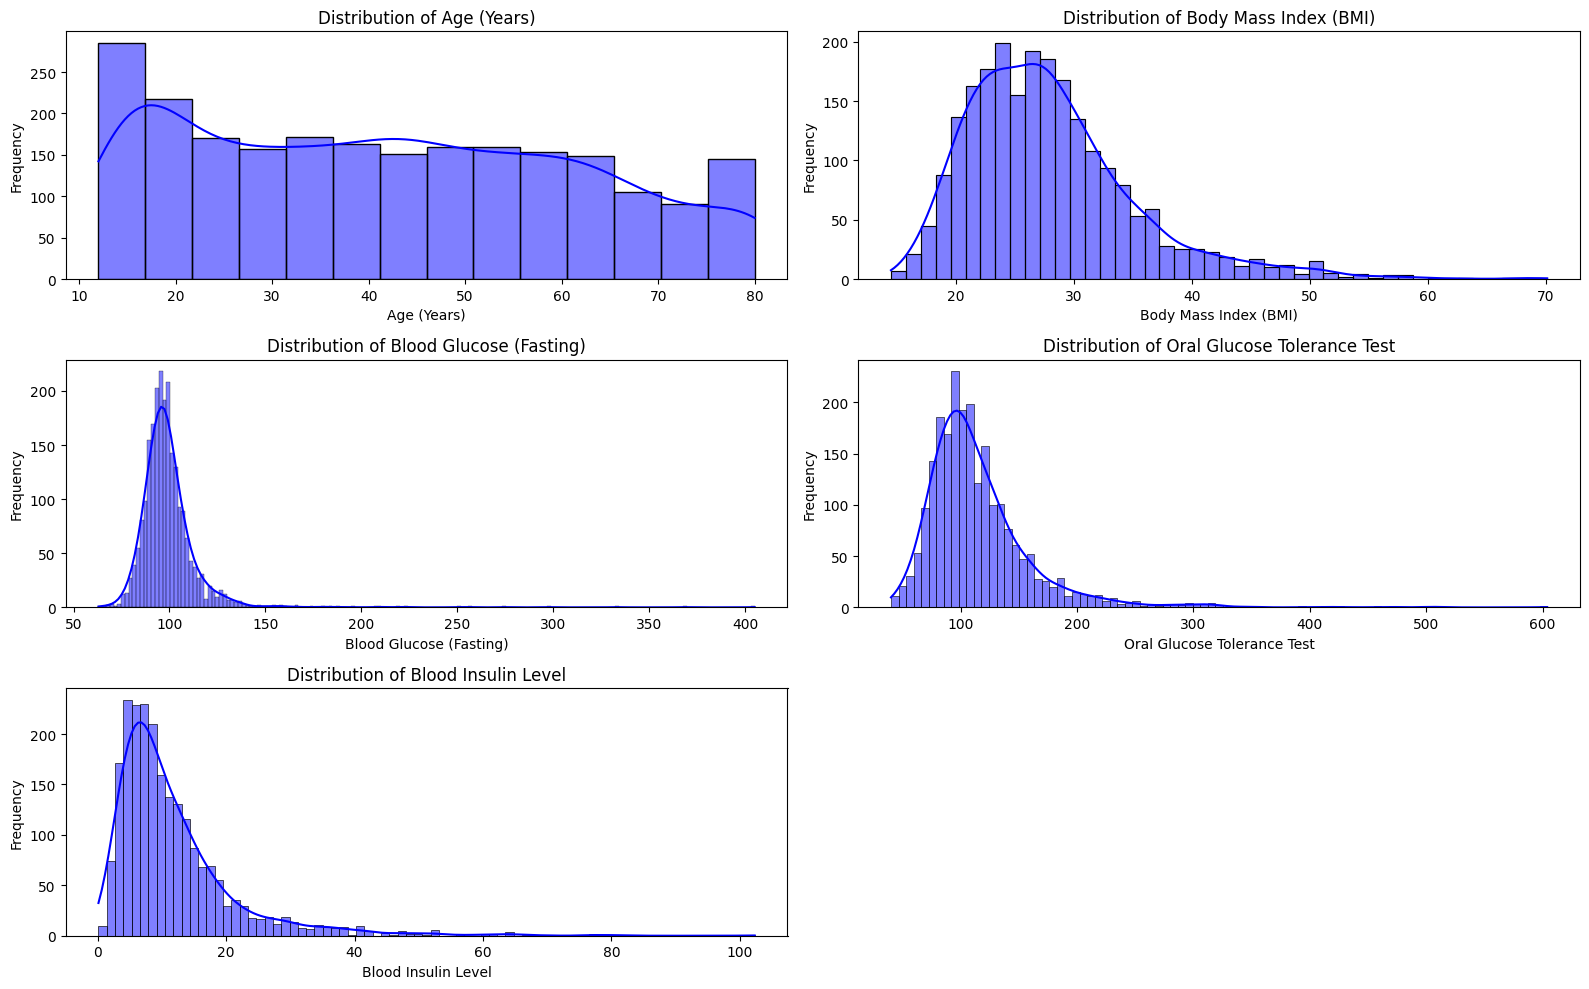

In [221]:
numerical = ['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

# Pemetaan nama deskriptif
simple_names_numerical = {
    'RIDAGEYR': 'Age (Years)',
    'BMXBMI': 'Body Mass Index (BMI)',
    'LBXGLU': 'Blood Glucose (Fasting)',
    'LBXGLT': 'Oral Glucose Tolerance Test',
    'LBXIN': 'Blood Insulin Level'
}

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {simple_names_numerical.get(col, col)}')
    plt.xlabel(simple_names_numerical.get(col, col))
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Berdasarkan grafik histogram, didapatkan bahwa:
- RIDAGEYR (Usia): Sebaran cenderung merata, dominan usia muda (12–30 tahun).
- BMXBMI (Indeks Massa Tubuh): Mayoritas berada di kategori overweight (25–30), distribusi mendekati normal.
- LBXGLU (Glukosa Puasa) & LBXGLT (Tes Toleransi Glukosa): Skewed ke kanan, menunjukkan sebagian kecil responden dengan kadar glukosa sangat tinggi (potensi diabetes).
- LBXIN (Insulin Darah): Distribusi sangat skewed ke kanan, indikasi adanya resistensi insulin.

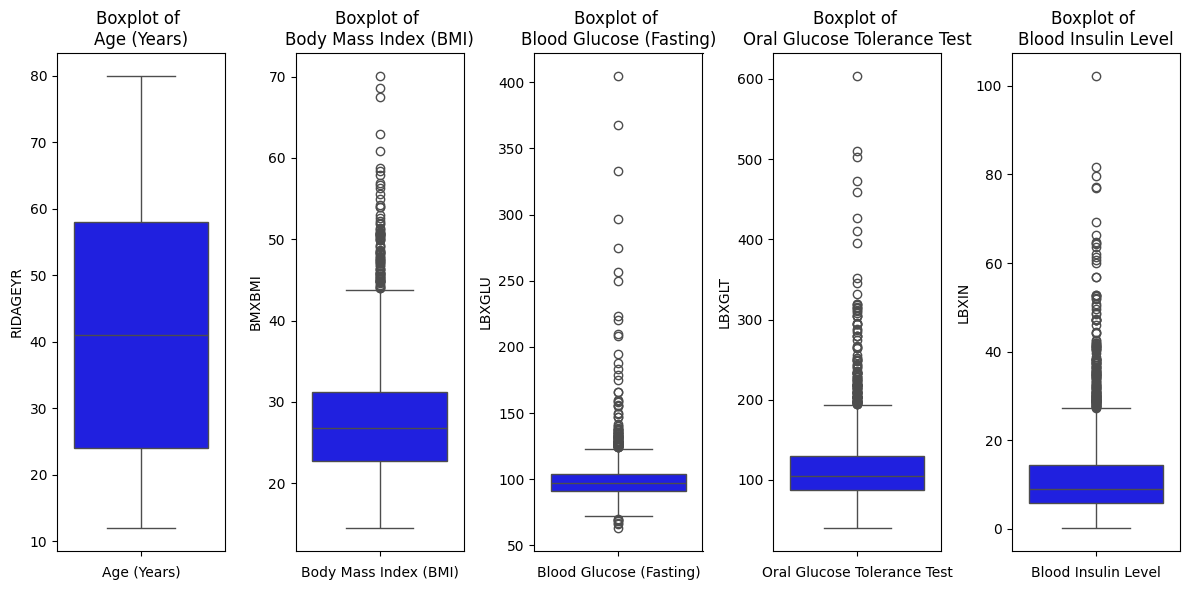

In [222]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df, y=col, color='blue', orient='v')
    plt.title(f'Boxplot of \n{simple_names_numerical.get(col, col)}')
    plt.xlabel(simple_names_numerical.get(col, col))
plt.tight_layout()
plt.show()

Berdasarkan hasil boxplot didapatkan bahwa:
- kolom BMXBMI, LBXGLU, LBXGLT, dan LBXIN memiliki jumlah outlier yang cukup banyak sehingga perlu dilakukan penanganan outlier

### Exploratory Data Analysis - Multivariate Analysis

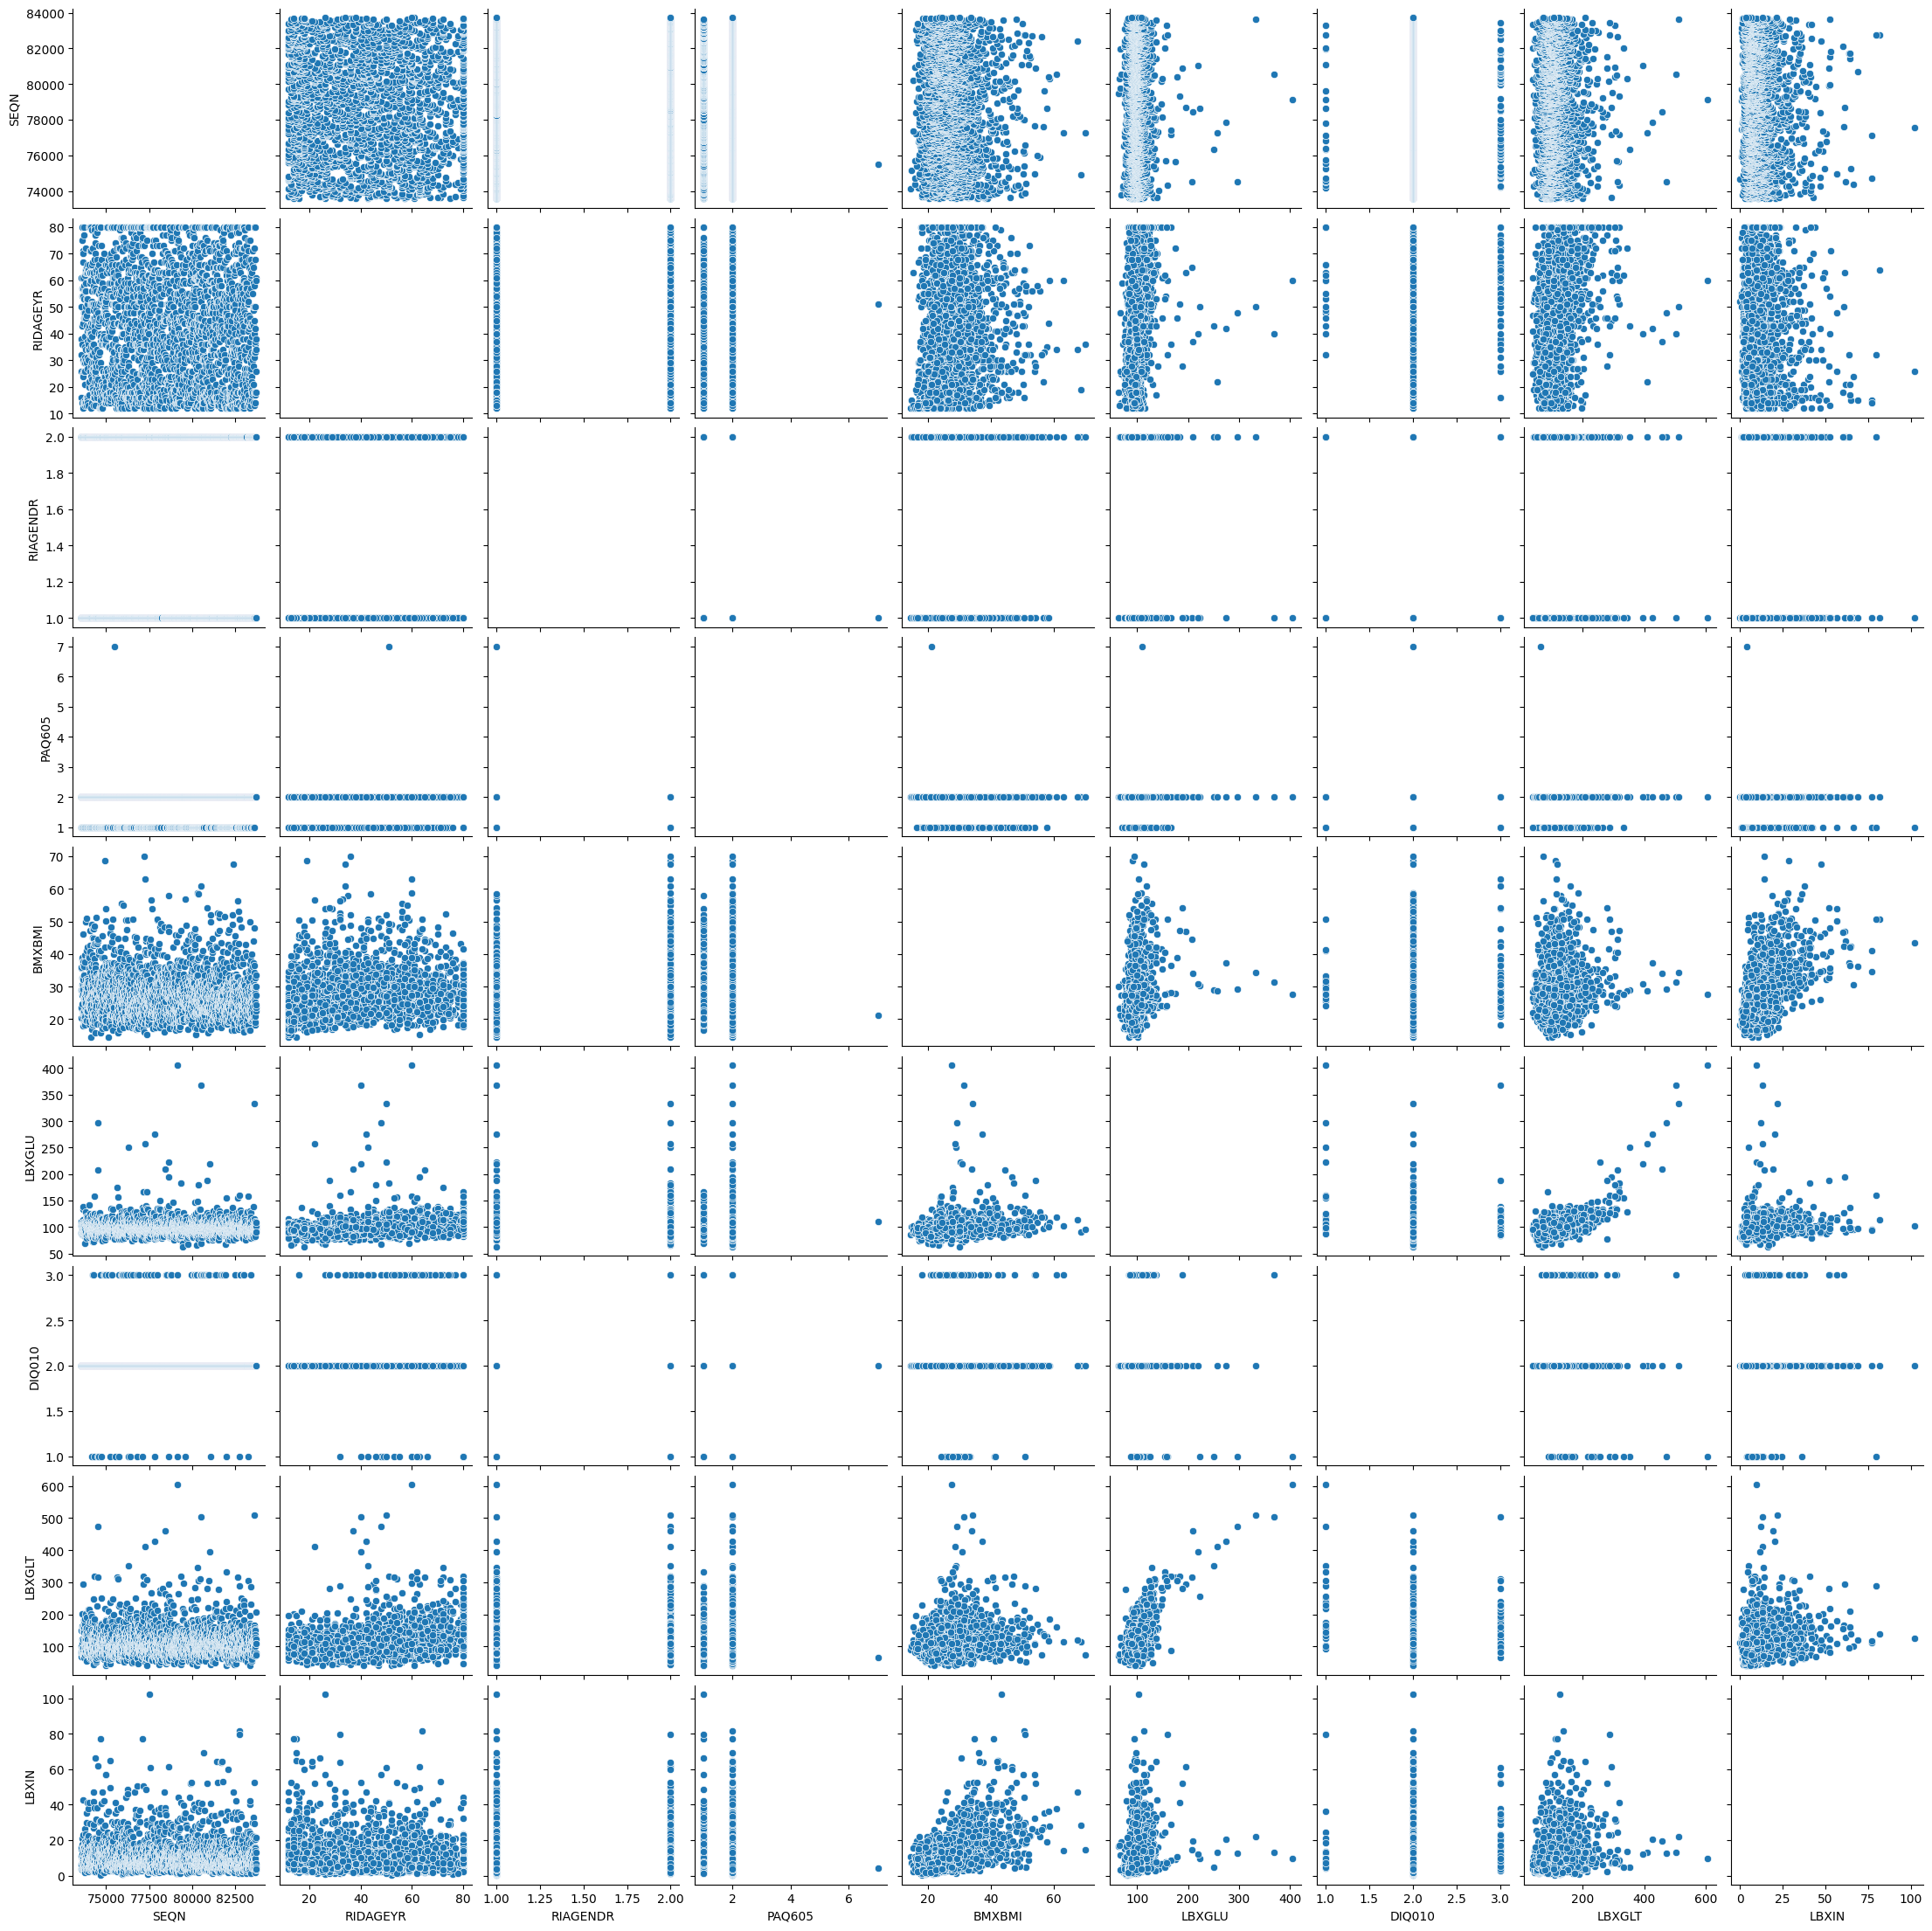

In [223]:
sns.pairplot(df, diag_kind=True)

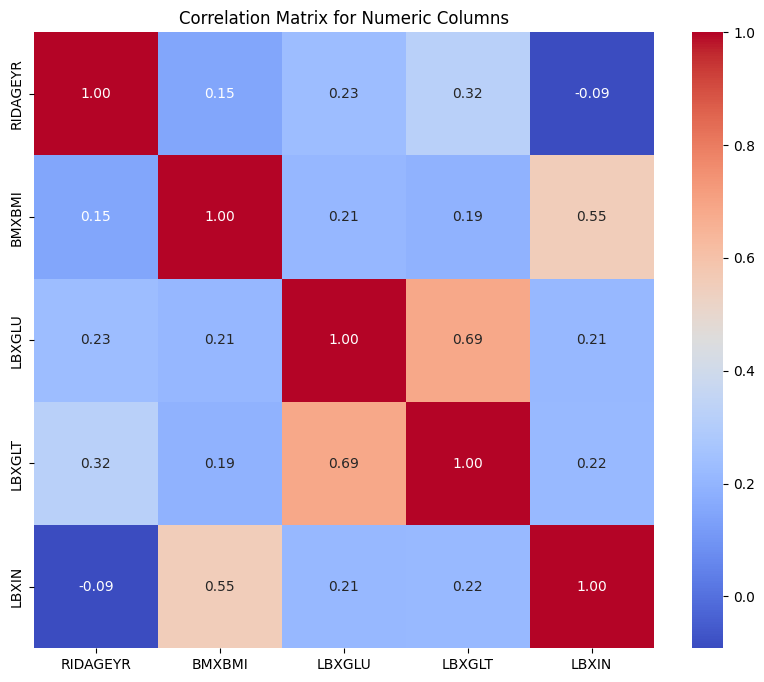

In [224]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

Berdasarkan hasil pairplot dan heatmap didapatkan bahwa:
- BMXBMI dengan LBXIN memiliki nilai korelasi positif sebesar 0.55
- LBXGLU dengan LBXGLT memiliki nilai korelasi positif sebesar 0.69

# Data Preparation

### Check for missing values & duplicated rows

In [225]:
# Check for duplicates and display the duplicated rows (if any)
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    display(duplicate_rows)
else:
    print("No duplicate rows found.")

# Check for missing values and display columns with missing values and their counts
missing_values = df.isna().sum()
missing_columns = missing_values[missing_values > 0]
if not missing_columns.empty:
    print("\nMissing Values:")
    display(missing_columns)
else:
    print("\nNo missing values found.")

No duplicate rows found.

No missing values found.


### Drop irrelevant columns

In [226]:
# Irrelevant columns: SEQN (respondent sequence number) and RIDAGEYR (respondent age)
irrelevant_columns = ['SEQN', 'RIDAGEYR']
df.drop(columns=irrelevant_columns, inplace=True)

### Remove outlier using IQR method

In [227]:
numerical = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_clean = remove_outliers_iqr(df, numerical)

### Convert target column into numerical using Label Encoding

In [228]:
# inisialisasi
encoder = LabelEncoder()
df_clean['age_group'] = encoder.fit_transform(df_clean['age_group'])
print(encoder.classes_)

['Adult' 'Senior']


### Data splitting with (80:20 ratio)

In [229]:
# Features and target
X = df_clean.drop(columns=['age_group'])
y = df_clean['age_group']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1518, 7)
y_train shape: (1518,)
X_test shape: (380, 7)
y_test shape: (380,)


### Oversampling for imbalanced target column

In [230]:
# Tampilkan distribusi awal
print("Distribusi sebelum SMOTE (y_train):")
print(y_train.value_counts(), "\n")

# Konfigurasi SMOTE hanya untuk target 'age_group'
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Tampilkan distribusi setelah SMOTE
print("Distribusi setelah SMOTE (y_resampled):")
print(pd.Series(y_resampled).value_counts())

Distribusi sebelum SMOTE (y_train):
age_group
0    1296
1     222
Name: count, dtype: int64 

Distribusi setelah SMOTE (y_resampled):
age_group
0    1296
1     648
Name: count, dtype: int64


### Data scaling using standardization

In [231]:
# make copy
X_resampled_scaled = X_resampled.copy()
X_test_scaled = X_test.copy()

# Inisialisasi scaler
scaler = StandardScaler()

# Fit & transform hanya kolom numerik
X_resampled_scaled[numerical] = scaler.fit_transform(X_resampled[numerical])
X_test_scaled[numerical] = scaler.transform(X_test[numerical])

# Modelling

Pada tahap ini, tiga algoritma machine learning diterapkan untuk klasifikasi kelompok usia: Logistic Regression, Random Forest, dan XGBoost. Setiap algoritma memiliki karakteristik, cara kerja, dan kelebihan yang berbeda.

Logistic Regression dipilih sebagai baseline model karena interpretabilitasnya yang tinggi dan kemampuannya memberikan probabilitas kelas yang terkalibrasi dengan baik. Random Forest diimplementasikan karena kemampuannya menangkap pola non-linear dan interaksi kompleks antar fitur, serta relatif tidak rentan terhadap overfitting. XGBoost dipilih karena performa yang tinggi untuk berbagai problem klasifikasi dan kemampuannya dalam menangani berbagai jenis data tanpa preprocessing ekstensif.

Model terbaik akan dipilih berdasarkan evaluasi performa pada data testing, dengan mempertimbangkan metrik evaluasi yang relevan untuk kasus klasifikasi dengan ketidakseimbangan kelas.

## Logistic Regression

Logistic Regression adalah metode statistik yang digunakan untuk menganalisis dataset di mana terdapat satu atau lebih variabel independen yang menentukan outcome. Algoritma ini bekerja dengan menghitung probabilitas keanggotaan kelas menggunakan fungsi sigmoid:

$$P(y=1|x) = \frac{1}{1 + e^{-(β_0 + β_1 x_1 + ... + β_n x_n)}}$$

Dimana:
- $P(y=1|x)$ adalah probabilitas bahwa sampel termasuk dalam kelas positif (senior)
- $β_0, β_1, ..., β_n$ adalah koefisien model
- $x_1, x_2, ..., x_n$ adalah fitur input

Kelebihan:
- Interpretabilitas yang tinggi, memungkinkan analisis koefisien untuk menentukan kontribusi relatif setiap fitur
- Computationally efficient, cepat dilatih bahkan pada dataset besar
- Memberikan probabilitas kelas yang terkalibrasi dengan baik

In [232]:
logreg_model = LogisticRegression(
    solver='liblinear',
    random_state=42
)

## Random Forest

Random Forest adalah algoritma ensemble learning yang bekerja dengan membangun banyak decision tree selama training dan menghasilkan kelas yang merupakan mode dari kelas-kelas (klasifikasi) individual trees. Algoritma ini menggunakan teknik bagging (bootstrap aggregating) untuk meningkatkan stabilitas dan akurasi.

Langkah-langkah dalam Random Forest:

1. **Bootstrap Sampling**: Ambil sampel dengan penggantian dari dataset training
2. **Random Feature Selection**: Untuk setiap node dalam tree, pilih subset acak dari fitur
3. **Decision Tree Building**: Bangun decision tree menggunakan sampel bootstrap dan fitur terpilih
4. **Voting**: Untuk prediksi, setiap tree memberikan "vote" dan kelas dengan vote terbanyak menjadi prediksi akhir

Kelebihan:
- Mampu menangkap hubungan non-linear dan interaksi kompleks antar fitur
- Robust terhadap outlier dan nilai yang hilang
- Relatif tidak rentan terhadap overfitting karena konsensus dari banyak pohon
- Menyediakan feature importance, memungkinkan analisis fitur yang berpengaruh

In [233]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

## Extreme Gradient Boosting

XGBoost (eXtreme Gradient Boosting) adalah implementasi yang dioptimalkan dari algoritma gradient boosting tree yang didesain untuk performa dan kecepatan tinggi. Berbeda dengan Random Forest yang menggunakan bagging, XGBoost menggunakan teknik boosting di mana model dibangun secara sekuensial, dengan setiap model baru berusaha memperbaiki kesalahan dari model sebelumnya.

Langkah kerja XGBoost:

1. **Inisialisasi**: Buat prediktor awal sederhana
2. **Iterasi untuk m = 1 hingga M**:
   - Hitung gradien dan hessian dari fungsi loss terhadap prediksi saat ini
   - Bangun tree baru untuk memodelkan gradien (residual error)
   - Tambahkan tree ke model dengan faktor shrinkage (learning rate)
3. **Output**: Model final yang merupakan kombinasi dari semua tree

Kelebihan:
- Performa yang sangat baik pada berbagai masalah machine learning
- Efisien dalam waktu dan memori karena implementasi gradient boosting yang dioptimalkan
- Memiliki teknik regularisasi built-in untuk mencegah overfitting
- Menyediakan feature importance yang dapat digunakan untuk interpretasi

In [234]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,  # L1 regularization
    reg_lambda=1,   # L2 regularization
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Evaluation

Untuk evaluasi model pada masalah klasifikasi biner dengan ketidakseimbangan kelas seperti dalam proyek ini, beberapa metrik evaluasi yang digunakan:

1. **Accuracy (Akurasi)**: Mengukur rasio prediksi benar terhadap total prediksi. Meskipun accuracy sering digunakan, metrik ini memiliki keterbatasan pada dataset tidak seimbang.

2. **Precision (Presisi)**: Mengukur akurasi prediksi positif, yaitu seberapa tepat model mengidentifikasi kelas positif. Presisi tinggi menunjukkan bahwa ketika model memprediksi seseorang sebagai 'senior', prediksi tersebut cenderung benar.

3. **Recall (Sensitivitas)**: Mengukur kemampuan model dalam mendeteksi semua kasus positif. Recall tinggi menunjukkan bahwa model dapat mengidentifikasi sebagian besar individu yang sebenarnya 'senior'.

4. **F1-Score**: Harmonic mean dari precision dan recall, memberikan ukuran tunggal yang menyeimbangkan kedua metrik tersebut. F1-Score sangat berguna untuk dataset tidak seimbang.

Model terbaik akan dipilih berdasarkan keseimbangan antara akurasi keseluruhan dan performa pada kelas minoritas (senior).

In [235]:
from sklearn.metrics import classification_report, accuracy_score

models = {
    'Logistic Regression': logreg_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

results = []

for name, model in models.items():
    # Training
    model.fit(X_resampled_scaled, y_resampled)

    # Prediksi
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_resampled_scaled)

    # Akurasi
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_resampled, y_pred_train)

    # Classification report per class
    report = classification_report(y_test, y_pred_test, target_names=encoder.classes_, output_dict=True)

    for label in encoder.classes_:
        results.append({
            'Model': name,
            'Class': label,
            'Test Accuracy': acc_test,
            'Train Accuracy': acc_train,
            'Precision': report[label]['precision'],
            'Recall': report[label]['recall'],
            'F1-score': report[label]['f1-score']
        })

results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:53:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Class,Test Accuracy,Train Accuracy,Precision,Recall,F1-score
0,Logistic Regression,Adult,0.821053,0.700617,0.892966,0.898462,0.895706
1,Logistic Regression,Senior,0.821053,0.700617,0.377358,0.363636,0.370370
2,Random Forest,Adult,0.852632,0.819959,0.874652,0.966154,0.918129
3,Random Forest,Senior,0.852632,0.819959,0.476190,0.181818,0.263158
4,XGBoost,Adult,0.842105,0.851852,0.873239,0.953846,0.911765
5,XGBoost,Senior,0.842105,0.851852,0.400000,0.181818,0.250000


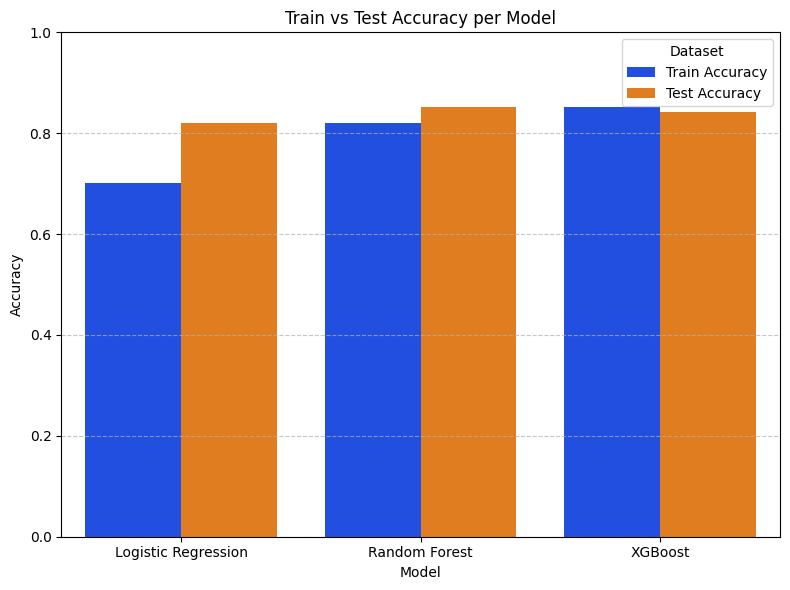

In [237]:
accuracy_plot_df = results_df.groupby('Model').first().reset_index()

# Ubah format ke long-form untuk seaborn
accuracy_long_df = accuracy_plot_df.melt(id_vars='Model',
                                         value_vars=['Train Accuracy', 'Test Accuracy'],
                                         var_name='Dataset',
                                         value_name='Accuracy')

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(data=accuracy_long_df, x='Model', y='Accuracy', hue='Dataset', palette='bright')

plt.title('Train vs Test Accuracy per Model')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.legend(title='Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Kesimpulan

Berdasarkan hasil evaluasi model, dapat diambil beberapa kesimpulan penting:

1. **Random Forest** memiliki akurasi testing tertinggi (85.3%), diikuti oleh XGBoost (84.2%) dan Logistic Regression (82.1%).

2. Untuk kelas "Senior" (kelas minoritas), **Logistic Regression** memiliki F1-Score tertinggi (37.0%) dan recall tertinggi (36.4%), menunjukkan kemampuan terbaik dalam mendeteksi kelompok usia lanjut.

3. **Logistic Regression** dipilih sebagai model terbaik untuk klasifikasi kelompok usia dalam konteks proyek ini karena:
   - Memiliki F1-Score tertinggi untuk kelas "Senior" yang merupakan kelas minoritas dan fokus utama prediksi
   - Memiliki recall tertinggi untuk kelas senior
   - Menawarkan interpretabilitas yang lebih tinggi dibandingkan model ensemble seperti Random Forest dan XGBoost, yang penting dalam konteks kesehatan

4. Ketidakseimbangan kelas dalam dataset berhasil ditangani dengan teknik SMOTE, meskipun memprediksi kelas minoritas (senior) tetap menjadi tantangan bagi semua model.

5. Indikator kesehatan seperti BMI, glukosa puasa, toleransi glukosa, dan kadar insulin memiliki hubungan yang signifikan dengan klasifikasi kelompok usia, sejalan dengan literatur medis yang menunjukkan perubahan metabolik seiring bertambahnya usia.

Untuk pengembangan lebih lanjut, beberapa rekomendasi yang dapat dipertimbangkan antara lain melakukan hyperparameter tuning lebih lanjut untuk meningkatkan recall kelas minoritas, mengeksplorasi teknik sampling alternatif, dan mengintegrasikan data longitudinal untuk memantau perubahan indikator kesehatan seiring waktu.